In [3]:
from google.colab import drive
drive.mount('/content/drive')
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks/밑바닥부터시작하는')
sys.path.append(os.pardir)
sys.path.append('/content/drive/MyDrive/Colab Notebooks/밑바닥부터시작하는/ch03')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/밑바닥부터시작하는/common')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/밑바닥부터시작하는/dataset')
import numpy as np

Mounted at /content/drive


# ch03/step_function.py

활성화 함수

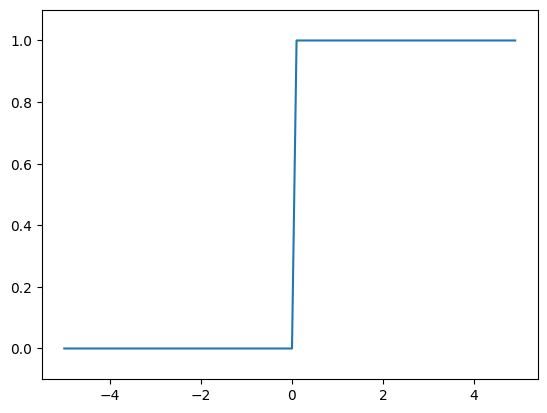

In [2]:
#계단함수 구현하기
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

def step_function(x):
  y= x > 0
  return y.astype(np.int64)

x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y #array([False, True, True], dtype=bool)
y = y.astype(np.int64)
y #array([0, 1, 1])

## 계단함수의 그래프 (numpy배열로)
def step_function(x):
    return np.array(x > 0, dtype=np.int64)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  #y축 범위 지정
plt.show()

# ch03/sigmoid.py

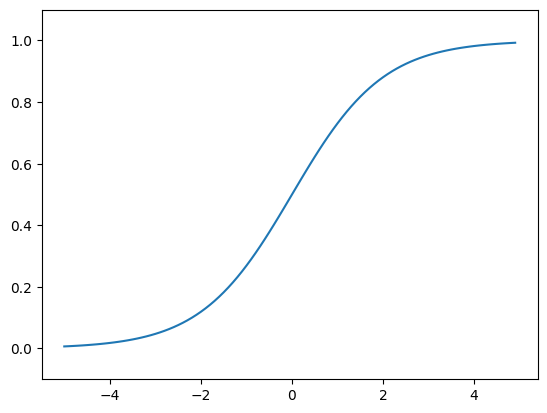

In [ ]:
# 시그모이드 함수 구현하기
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # x가 넘파이배열어도 가능하게.

# x = np.array([-1.0, 1.0, 2.0])
# sigmoid(x) #array([ 0.26894142, 0.73105858, 0.88079708])

# t = np.array([1.0, 2.0, 3.0])
# 1.0 + t  #array([ 2., 3., 4.])
# 1.0 / t  #array([1.        , 0.5       , 0.33333333])

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1) #y축범위
plt.show()


# ch03/sig_step_compare.py

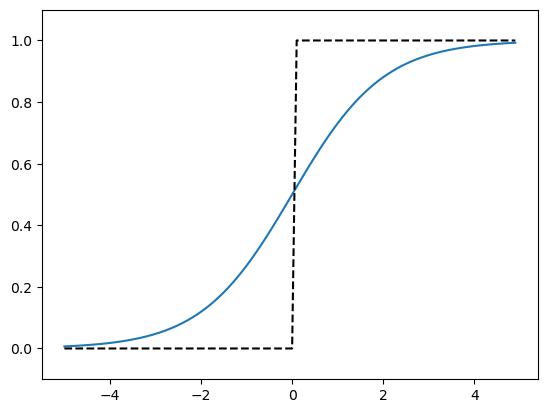

In [ ]:
##시그모이드 & 계단함수 비교

import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def step_function(x):
    return np.array(x > 0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축범위
plt.show()

# ch03/relu.py

비선형 함수: sigmoid, 계단. 여러 층 쌓는 혜택이 있음

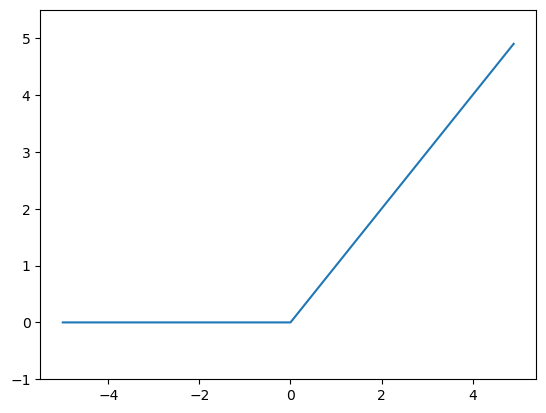

In [ ]:
# ReLu함수
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

In [ ]:
## 넘파이의 다차원 배열 계산
import numpy as np

A = np.array([1, 2, 3, 4])
np.ndim(A) #1(차원)
A.shape #(4,) #원소4개 형상
A.shape[0] #4


B = np.array([[1,2], [3,4], [5,6]])
np.ndim(B) #2(차원)
B.shape #(3, 2) 3*2배열


A = np.array([[1,2], [3,4]])
A. shape #(2, 2)
B = np.array([[5,6], [7,8]])
B. shape #(2, 2)
np.dot(A, B) #곱1 array([[19, 22],[43, 50]])

A= np.array([[1,2,3], [4,5,6]])
A.shape #(2, 3)
B = np.array([[1,2], [3,4], [5,6]])
B. shape #(3, 2)
np.dot(A, B) #곱2 array([[22, 28], [49, 64]])


C = np.array([[1,2], [3,4]])
C.shape #(2, 2)
A.shape #(2, 3)
np.dot(A, C) #ERR: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)



A = np.array([[1,2], [3, 4], [5,6]])
A.shape #[3, 2)
B= np.array([7,8])
B.shape # 2,)
np.dot(A, B) #곱3 array([23, 53, 83])

#신경망에서의 행렬곱
X = np.array([1, 2])
X.shape #(2,)
W = np.array([[1, 3, 5], [2, 4, 6]])
W.shape #(2, 3)
Y = np.dot(X, W)
print(Y) #곱4 [ 5 11 17]

In [ ]:
### 3층 신경망 구현하기  ###

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(W1.shape) # (2, 3)
print(X.shape) # (2,)
print (B1.shape) # (3,)

A1 = np.dot(X, W1) + B1

Z1 = sigmoid(A1)
print(A1) # [0.3, 0.7, 1.1]
print(Z1) # [0.57444252, 0.66818777, 0.75026011]

#1층 -> 2층(시그모이드)
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print (Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid (A2)

#2층 -> 출력층 (항등함수)
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot (Z2, W3) + B3
Y = identity_function (A3)  # Y = A3

#구현정리
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network[ 'W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])
  return network

def forward (network, x):
  W1, W2, W3 = network [ 'W1'], network [ 'W2'], network['W3']
  b1, b2, b3 = network['b1'], network ['b2'], network['b3']
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid (a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid (a2)
  a3 = np.dot (z2, W3) + b3
  y = identity_function(a3)
  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward (network, x) #[ 0.31682708  0.69627909]
print(y)


출력층 설계하기


In [ ]:
#소프트맥스 함수 구현
a = np.array([0.3, 2.9, 4.0])
exp_a= np.exp(a) #지수함수
print(exp_a)

sum_exp_a= np. sum(exp_a)
print(sum_exp_a)

y= exp_a / sum_exp_a
print(y)

def softmax(a):
  exp_a= np.exp(a)
  sum_exp_a= np. sum(exp_a)
  y = exp_a / sum_exp_a
  return y

#NAN (not a number)예시
a = np.array([1010, 1000, 990])
np.exp(a) / np. sum(np.exp(a)) #제대로 계산되지 않는다. array([ nan, nan, nan])
c = np.max(a) #1010
a - c   #array([0, -10, -20])
np.exp(a - c)  / np. sum(np.exp(a - c)) #array([ 9.99954600e-01, 4.53978686e-05,2.06106005e-09])

def softmax(a):
  c= np.max(a)
  exp_a= np.exp(a-c) #overflow 대책
  sum_exp_a= np. sum(exp_a)
  y = exp_a / sum_exp_a
  return y

#소프트맥스 함수 특징 : 출력은 0~1.0사이의 실수, 출력총합은 1
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y) # [ 0.01821127 0.24519181 0.73659691]
np.sum(y) #1.0

# ch03/mnist_show.py

In [ ]:
sys.path.append(os.pardir)
from mnist import load_mnist
import pickle

#처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

#각 데이터의 형상 출력
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)


import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5
print(img.shape)  # (784,)
img = img.reshape(28, 28)
print(img.shape)  # (28, 28)

img_show(img)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
5
(784,)
(28, 28)


# ch03/neuralnet_mnist.py

In [ ]:
## 신경망의 추론처리 ##

import sys, os
sys.path.append(os.pardir)
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    #학습된 가중치 매개변수 담긴 파일
    with open("/content/drive/MyDrive/Colab Notebooks/밑바닥부터시작하는/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) #확률이 가장 높은 원소의 index
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


# ch03/neuralnet_mnist_batch.py

In [6]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("/content/drive/MyDrive/Colab Notebooks/밑바닥부터시작하는/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y

## 배치처리 ##
x, _ = get_data()
network = init_network()
W1, W2, W3 = network [ 'W1'], network [ 'W2'], network['W3']
x.shape #(10000, 784)
x[0].shape #(784,)
W1.shape #(784, 50)
W2.shape #(50, 100)
W3.shape #(100, 10)

## 배치처리 구현 ##
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
print("Accuracy:" + str(float(accuracy_cnt) / len(x))) #Accuracy:0.9352

## 예시 range()함수
# list(range(0, 10))
# list(range(0, 10, 3))

## argmax()함수
# x = np.array( [[0.1, 0.8, 0.1], [0.3, 0.1, 0.61, [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]]] )
# y = np.argmax(x, axis=1)
# print(y) #[1 2 1 0]

## 결과와 실제답 비교
# y = np.array([1, 2, 1, 0])
# t = np.array([1, 2, 0, 0])
# print(y==t) #[True True False True]
# np.sum(y==t) #3

Accuracy:0.9352
